## References

https://arxiv.org/abs/1812.02353


In [69]:
import numpy as np
import torch
import matplotlib.pyplot as plt

[ 1.          1.39561243  1.94773404  2.71828183  3.79366789  5.29449005
  7.3890561  10.3122585  14.3919161  20.08553692]


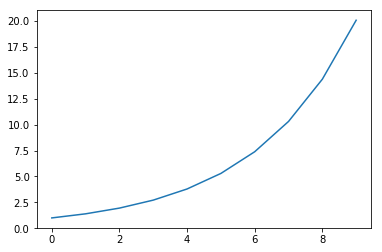

In [70]:
n_actions = 10
action_rewards = np.exp(np.arange(n_actions)/3)
print(action_rewards)
plt.plot(action_rewards)

# Off-Policy w/ Correction

tensor([0.1818, 0.1636, 0.1455, 0.1273, 0.1091, 0.0909, 0.0727, 0.0545, 0.0364,
        0.0182])


<BarContainer object of 10 artists>

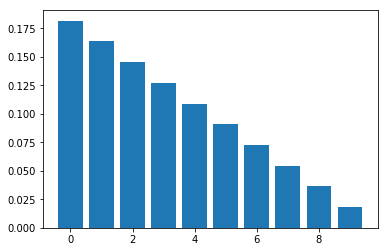

In [71]:
beta_policy = torch.as_tensor((11 - np.arange(1, n_actions+1)) / 55, dtype=torch.float)
print(beta_policy)
plt.bar(range(n_actions), beta_policy.numpy())

0 tensor(23.6449, grad_fn=<NegBackward>) tensor([0.3070, 0.0272, 0.3489, 0.5200, 0.1413, 0.2458, 0.8877, 0.3951, 0.7825,
        0.7313])
20 tensor(2.9198, grad_fn=<NegBackward>) tensor([-0.4063, -0.5222, -0.3401, -0.2300, -0.3417, -0.1518,  0.0827,  0.1790,
         0.6962,  5.4211])
40 tensor(0.8451, grad_fn=<NegBackward>) tensor([-0.4657, -0.5738, -0.4003, -0.2921, -0.3935, -0.1952,  0.0388,  0.1272,
         0.6676,  5.8736])
60 tensor(1.7223, grad_fn=<NegBackward>) tensor([-0.4811, -0.5861, -0.4131, -0.3031, -0.4003, -0.2012,  0.0539,  0.1591,
         0.7060,  5.8527])
80 tensor(0.2118, grad_fn=<NegBackward>) tensor([-0.5587, -0.6561, -0.4933, -0.3905, -0.4790, -0.2848, -0.0550,  0.0483,
         0.5359,  6.7201])
100 tensor(0.3045, grad_fn=<NegBackward>) tensor([-0.5655, -0.6615, -0.4983, -0.3971, -0.4831, -0.2846, -0.0466,  0.0578,
         0.5839,  6.6818])
120 tensor(0.3306, grad_fn=<NegBackward>) tensor([-0.5832, -0.6768, -0.5159, -0.4152, -0.4974, -0.3035, -0.0587,  0.0512,

(0, 20)

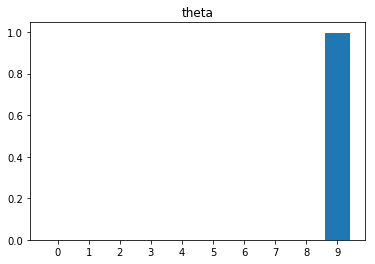

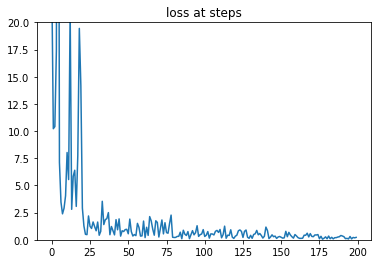

In [80]:
theta = torch.rand(n_actions, dtype=torch.float, requires_grad=True)

steps = 200
batch_size = 20
lr = 1e-1
loss_steps = []
for t in range(steps):
    actions = np.random.choice(n_actions, size=batch_size, p=beta_policy.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    tgt_policy = torch.softmax(input=theta, dim=0)
    weight = tgt_policy.detach()[actions] / beta_policy[actions]
    weight = weight.clamp_max(1e3)
    loss = -torch.mean(weight * rewards * torch.log(tgt_policy[actions]))
    loss_steps.append(loss.item())
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));
ax.set_title('theta')
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(range(len(loss_steps)), loss_steps)
ax.set_title('loss at steps')
ax.set_ylim(0, 20)

# Off-Policy w/o Correction

0 tensor(10.2628, grad_fn=<NegBackward>) tensor([0.5009, 0.7894, 0.8712, 0.4325, 0.8982, 0.6529, 0.9332, 0.0434, 0.7794,
        0.2631])
20 tensor(8.6279, grad_fn=<NegBackward>) tensor([0.1822, 0.3692, 0.4840, 0.3968, 0.7115, 0.7356, 0.7900, 1.0468, 0.8213,
        0.6268])
40 tensor(13.1445, grad_fn=<NegBackward>) tensor([0.0669, 0.2746, 0.3133, 0.4496, 0.5864, 0.9187, 0.9269, 1.0327, 0.9466,
        0.6483])
60 tensor(9.0418, grad_fn=<NegBackward>) tensor([0.0368, 0.2431, 0.3017, 0.3148, 0.6165, 1.0212, 0.7957, 0.9558, 1.1372,
        0.7412])
80 tensor(7.4326, grad_fn=<NegBackward>) tensor([0.0236, 0.2725, 0.3456, 0.3787, 0.7321, 1.0530, 0.8361, 0.9019, 1.2276,
        0.3929])
100 tensor(8.0580, grad_fn=<NegBackward>) tensor([-0.0706,  0.2252,  0.3883,  0.3970,  0.8147,  0.9423,  1.1896,  0.8013,
         0.9419,  0.5344])
120 tensor(9.8882, grad_fn=<NegBackward>) tensor([-0.1214,  0.2023,  0.4511,  0.5185,  0.8321,  0.8879,  0.9589,  0.7326,
         1.0667,  0.6354])
140 tensor(

Text(0.5, 1.0, 'loss at steps')

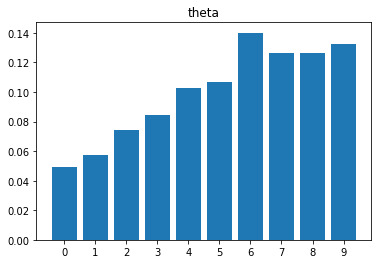

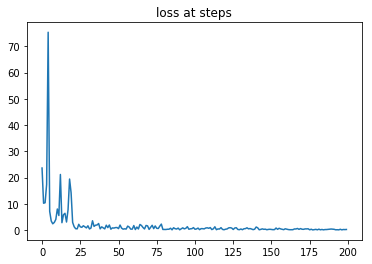

In [82]:
theta = torch.rand(n_actions, dtype=torch.float, requires_grad=True)

steps = 200
batch_size = 20
lr = 1e-1
for t in range(steps):
    actions = np.random.choice(n_actions, size=batch_size, p=beta_policy.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    tgt_policy = torch.softmax(input=theta, dim=0)
    loss = -torch.mean(rewards * torch.log(tgt_policy[actions]))
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));
ax.set_title('theta')
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(range(len(loss_steps)), loss_steps)
ax.set_title('loss at steps')

# On-Policy

0 tensor(14.3345, grad_fn=<NegBackward>) tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
20 tensor(4.9731, grad_fn=<NegBackward>) tensor([0.1189, 0.1579, 0.2156, 0.3077, 0.2954, 0.3557, 0.5611, 1.1730, 2.1160,
        4.6987])
40 tensor(0.5065, grad_fn=<NegBackward>) tensor([-2.1197e-03,  2.8830e-02,  9.0856e-02,  1.6348e-01,  1.5926e-01,
         2.8706e-01,  3.9931e-01,  8.3396e-01,  1.6210e+00,  6.4184e+00])
60 tensor(0.3065, grad_fn=<NegBackward>) tensor([-0.0521, -0.0226,  0.0362,  0.1048,  0.1565,  0.2715,  0.3256,  0.8672,
         1.4563,  6.8567])
80 tensor(4.3113, grad_fn=<NegBackward>) tensor([-8.6129e-02, -5.7712e-02, -9.8282e-04,  6.5042e-02,  1.1469e-01,
         2.5079e-01,  2.7621e-01,  8.8508e-01,  1.4401e+00,  7.1129e+00])
100 tensor(0.1782, grad_fn=<NegBackward>) tensor([-0.1139, -0.0863, -0.0216,  0.0328,  0.0993,  0.2376,  0.2365,  0.8132,
         1.4455,  7.3569])
120 tensor(0.1372, grad_fn=<NegBackward>) tensor([-0.1343, -0.1073, -0.0439,  0.0225,  0.0742,  0.2

Text(0.5, 1.0, 'loss at steps')

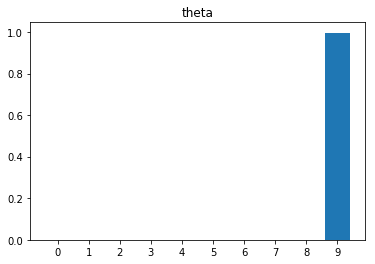

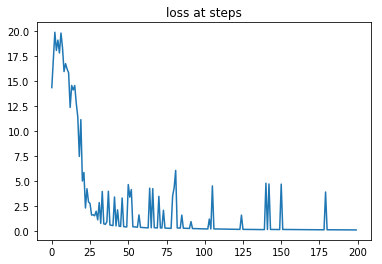

In [83]:
theta = torch.ones(n_actions, dtype=torch.float, requires_grad=True)

steps = 200
batch_size = 20
lr = 1e-1
loss_steps = []
for t in range(steps):
    tgt_policy = torch.softmax(input=theta, dim=0)
    actions = np.random.choice(n_actions, size=batch_size, p=tgt_policy.data.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    loss = -torch.mean(rewards * torch.log(tgt_policy[actions]))
    loss_steps.append(loss.item())
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));
ax.set_title('theta')
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(range(len(loss_steps)), loss_steps)
ax.set_title('loss at steps')

# Top-K Off-Policy Correction

0 tensor(26.6320, grad_fn=<NegBackward>) tensor([0.5980, 0.7045, 0.8523, 0.5438, 0.5836, 0.7923, 0.5415, 0.9782, 0.6724,
        0.3276])
20 tensor(8.1573, grad_fn=<NegBackward>) tensor([0.4208, 0.5206, 0.6622, 0.4287, 0.4700, 0.8203, 0.6302, 1.1586, 0.6764,
        0.8064])
40 tensor(16.1801, grad_fn=<NegBackward>) tensor([0.2639, 0.3580, 0.4918, 0.3291, 0.3717, 0.7766, 0.5373, 1.1214, 1.1404,
        1.2039])
60 tensor(59.5981, grad_fn=<NegBackward>) tensor([0.1368, 0.2303, 0.3714, 0.2316, 0.3361, 0.6757, 0.5811, 0.9947, 1.3149,
        1.7215])
80 tensor(18.8810, grad_fn=<NegBackward>) tensor([-0.0056,  0.0807,  0.2115,  0.0983,  0.2444,  0.5611,  0.5582,  1.1701,
         1.3824,  2.2930])
100 tensor(16.8588, grad_fn=<NegBackward>) tensor([-0.1024, -0.0144,  0.1077,  0.0244,  0.1908,  0.4711,  0.5043,  1.0899,
         1.7137,  2.6091])
120 tensor(38.1008, grad_fn=<NegBackward>) tensor([-0.1508, -0.0628,  0.0616, -0.0124,  0.1818,  0.4784,  0.5491,  1.1739,
         2.0599,  2.3153

(0, 40)

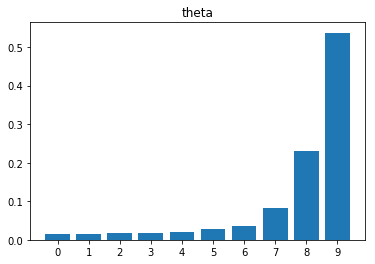

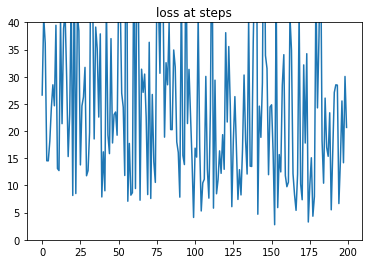

In [95]:
theta = torch.rand(n_actions, dtype=torch.float, requires_grad=True)

K = 2
steps = 200
batch_size = 20
lr = 1e-2
loss_steps = []
for t in range(steps):
    actions = np.random.choice(n_actions, size=batch_size, p=beta_policy.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    tgt_policy = torch.softmax(input=theta, dim=0)
    # Equ. 3
    tgt_policy_action_proba = tgt_policy.detach()[actions]
    weight = tgt_policy_action_proba / beta_policy[actions]
    weight = weight.clamp_max(1e3) 
    # Equ. 7
    weight *= K * (1 - tgt_policy_action_proba) ** (K - 1)
    loss = -torch.mean(weight * rewards * torch.log(tgt_policy[actions]))
    loss_steps.append(loss.item())
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));
ax.set_title('theta')
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(range(len(loss_steps)), loss_steps)
ax.set_title('loss at steps')
ax.set_ylim(0, 40)